## MARKET BASKET ANALYSIS with Apriori

![](https://miro.medium.com/max/2880/1*DHfQvlMVBaJCHpYmj1kmCw.png)

In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import mlxtend as ml
print('MXTend Version: %s' % ml.__version__)
print('Pandas Version: %s' % pd.__version__)
print('Numpy Version: %s' % np.__version__)

/kaggle/input/datasets-for-appiori/basket_analysis.csv
MXTend Version: 0.18.0
Pandas Version: 1.2.3
Numpy Version: 1.19.5


In [2]:
df = pd.read_csv('../input/datasets-for-appiori/basket_analysis.csv')
df.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df1=df[df].count().sort_values(ascending=False)
df1

chocolate       421
Butter          420
Yogurt          420
Ice cream       410
Sugar           409
Kidney Beans    408
Corn            407
Milk            405
Cheese          404
Onion           403
Nutmeg          401
Dill            398
Unicorn         389
Bread           384
Eggs            384
Apple           383
dtype: int64

<AxesSubplot:>

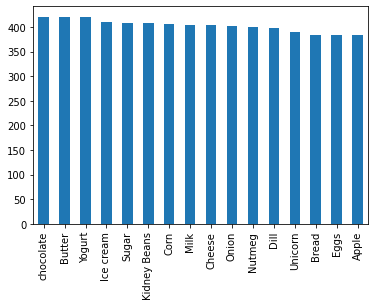

In [30]:
df1.plot(kind="bar")

**How does Apriori Algorithm Work ?**

A key concept in Apriori algorithm is the anti-monotonicity of the support measure. It assumes that

All subsets of a frequent itemset must be frequent
Similarly, for any infrequent itemset, all its supersets must be infrequent too
Step 1: Create a frequency table of all the items that occur in all the transactions.

Step 2: We know that only those elements are significant for which the support is greater than or equal to the threshold support.

Step 3: The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA.

Step 4: We will now count the occurrences of each pair in all the transactions.

Step 5: Again only those itemsets are significant which cross the support threshold

Step 6: Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

In [36]:
apriori(df, min_support=0.1, use_colnames = True)

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
164,0.101101,"(Ice cream, Nutmeg, chocolate)"
165,0.101101,"(Ice cream, Onion, chocolate)"
166,0.100100,"(Milk, Kidney Beans, Nutmeg)"
167,0.101101,"(Kidney Beans, Nutmeg, Yogurt)"


In [38]:
frequent_itemsets = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.383383,(Apple),1
1,0.384384,(Bread),1
2,0.420420,(Butter),1
3,0.404404,(Cheese),1
4,0.407407,(Corn),1
...,...,...,...
164,0.101101,"(Ice cream, Nutmeg, chocolate)",3
165,0.101101,"(Ice cream, Onion, chocolate)",3
166,0.100100,"(Milk, Kidney Beans, Nutmeg)",3
167,0.101101,"(Kidney Beans, Nutmeg, Yogurt)",3


In [39]:
print("Length:", len(apriori(df, min_support=0.1)))

Length: 169


In [40]:
frequent_itemsets.head(10)

,support,itemsets,length
0,0.383383,(Apple),1
1,0.384384,(Bread),1
2,0.420420,(Butter),1
3,0.404404,(Cheese),1
4,0.407407,(Corn),1
5,0.398398,(Dill),1
6,0.384384,(Eggs),1
7,0.410410,(Ice cream),1
8,0.408408,(Kidney Beans),1
9,0.405405,(Milk),1


In [42]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.2) ]

,support,itemsets,length
49,0.207207,"(Ice cream, Butter)",2
50,0.202202,"(Kidney Beans, Butter)",2
57,0.202202,"(chocolate, Butter)",2
62,0.200200,"(Kidney Beans, Cheese)",2
107,0.202202,"(Ice cream, chocolate)",2
120,0.211211,"(Milk, chocolate)",2


Rule generation is a common task in the mining of frequent patterns. An association rule is an implication expression of the form X→Y, where X and Y are disjoint itemsets. A more concrete example based on consumer behaviour would be {Diapers}→{Beer} suggesting that people who buy diapers are also likely to buy beer. To evaluate the "interest" of such an association rule, different metrics have been developed. The current implementation make use of the confidence and lift metrics.

**Confidence'**:

The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.

In [44]:
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.30)

In [45]:
print("Number of rulesets:", len(rules1))

Number of rulesets: 339


In [46]:
rules1 = rules1.sort_values(['confidence'], ascending=False)

rules1[1:11]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
315,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446
284,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968
317,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051
249,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902
312,"(Ice cream, Dill)",(chocolate),0.185185,0.421421,0.103103,0.556757,1.321140,0.025062,1.305330
286,"(Ice cream, Cheese)",(Kidney Beans),0.187187,0.408408,0.104104,0.556150,1.361749,0.027655,1.332863
283,"(Onion, Cheese)",(Dill),0.185185,0.398398,0.102102,0.551351,1.383920,0.028325,1.340919
331,"(Milk, Nutmeg)",(Kidney Beans),0.182182,0.408408,0.100100,0.549451,1.345346,0.025695,1.313045
263,"(Unicorn, Butter)",(Ice cream),0.182182,0.410410,0.100100,0.549451,1.338783,0.025331,1.308601
240,"(Apple, Sugar)",(Butter),0.182182,0.420420,0.100100,0.549451,1.306907,0.023507,1.286384


In [47]:
rules1["antecedent_len"] = rules1["antecedents"].apply(lambda x: len(x))
rules1["consequents_len"] = rules1["consequents"].apply(lambda x: len(x))
rules1[1:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
315,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,2,1
284,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,2,1
317,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,2,1
249,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,2,1
312,"(Ice cream, Dill)",(chocolate),0.185185,0.421421,0.103103,0.556757,1.321140,0.025062,1.305330,2,1


The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

In [48]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules2 = rules2.sort_values(['lift'], ascending=False)
rules2[1:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
325,(Onion),"(Dill, Cheese)",0.403403,0.177177,0.102102,0.253102,1.428523,0.030628,1.101653
404,(chocolate),"(Unicorn, Dill)",0.421421,0.168168,0.101101,0.239905,1.426578,0.030231,1.094379
401,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764
393,(chocolate),"(Milk, Dill)",0.421421,0.190190,0.114114,0.270784,1.423753,0.033964,1.110521
388,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446


In [49]:
rules2["antecedent_len"] = rules2["antecedents"].apply(lambda x: len(x))
rules2["consequents_len"] = rules2["consequents"].apply(lambda x: len(x))
rules2[1:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
325,(Onion),"(Dill, Cheese)",0.403403,0.177177,0.102102,0.253102,1.428523,0.030628,1.101653,1,2
404,(chocolate),"(Unicorn, Dill)",0.421421,0.168168,0.101101,0.239905,1.426578,0.030231,1.094379,1,2
401,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,2,1
393,(chocolate),"(Milk, Dill)",0.421421,0.190190,0.114114,0.270784,1.423753,0.033964,1.110521,1,2
388,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,2,1


In [50]:
rules1[(rules1['antecedent_len'] >= 1) &
       (rules1['confidence'] >= 0.20) &
       (rules1['lift'] > 1) ].sort_values(['confidence'], ascending=False)[1:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
315,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,2,1
284,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,2,1
317,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,2,1
249,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,2,1
312,"(Ice cream, Dill)",(chocolate),0.185185,0.421421,0.103103,0.556757,1.321140,0.025062,1.305330,2,1
286,"(Ice cream, Cheese)",(Kidney Beans),0.187187,0.408408,0.104104,0.556150,1.361749,0.027655,1.332863,2,1
283,"(Onion, Cheese)",(Dill),0.185185,0.398398,0.102102,0.551351,1.383920,0.028325,1.340919,2,1
263,"(Unicorn, Butter)",(Ice cream),0.182182,0.410410,0.100100,0.549451,1.338783,0.025331,1.308601,2,1
240,"(Apple, Sugar)",(Butter),0.182182,0.420420,0.100100,0.549451,1.306907,0.023507,1.286384,2,1


Filtering for bread pairs

In [51]:
rules1[rules1['antecedents'] == {'Bread'}].sort_values(['confidence'], ascending=False)[1:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
56,(Bread),(chocolate),0.384384,0.421421,0.185185,0.481771,1.143204,0.023197,1.116453,1,1
41,(Bread),(Ice cream),0.384384,0.410410,0.181181,0.471354,1.148495,0.023426,1.115283,1,1
30,(Bread),(Butter),0.384384,0.420420,0.180180,0.468750,1.114955,0.018577,1.090973,1,1
50,(Bread),(Sugar),0.384384,0.409409,0.179179,0.466146,1.138581,0.021809,1.106277,1,1
48,(Bread),(Onion),0.384384,0.403403,0.178178,0.463542,1.149077,0.023116,1.112102,1,1
44,(Bread),(Milk),0.384384,0.405405,0.174174,0.453125,1.117708,0.018343,1.087259,1,1
35,(Bread),(Corn),0.384384,0.407407,0.174174,0.453125,1.112216,0.017573,1.083598,1,1
32,(Bread),(Cheese),0.384384,0.404404,0.173173,0.450521,1.114035,0.017726,1.083928,1,1
46,(Bread),(Nutmeg),0.384384,0.401401,0.171171,0.445312,1.109394,0.016879,1.079164,1,1
